In [1]:
import glob
import gzip
import time 
from tqdm import tqdm



def parse_dat_file(path):
    ident_to_seq = {}
    curr_seq = ""
    curr_ident =  num_expected_residues= None
    
    with gzip.open(path, "rt") as f:
        # lines = [l for l in f]
        for l in tqdm(f):
            if l.startswith("ID"):
                curr_ident = l.split()[1]
            elif l.startswith("SQ"):

                num_expected_residues = int(l.split()[2])
            elif l.startswith("//"):
                
                if curr_ident and curr_seq:
                    assert len(curr_seq) == num_expected_residues, "Error in %s, expected %d residues but got %d: %s" % (curr_ident, num_expected_residues, len(curr_seq), curr_seq)
                    ident_to_seq[curr_ident] = curr_seq
                curr_seq = ""
                curr_ident = num_expected_residues = None
            elif num_expected_residues and l.startswith("  "):
                curr_seq += l.replace(" ", "").replace("\t", "").replace("\n", "")
    return ident_to_seq
            
category_to_ident_to_seq = {}
for path in glob.glob("../data/swissprot-dat-files/*.dat.gz"):
    category = path.split("/")[-1].replace(".dat.gz", "").split("_")[-1]
    t0 = time.time()
    ident_to_seq = parse_dat_file(path)
    print("Parsed %s in %0.2f seconds" % (path, time.time() - t0))
    category_to_ident_to_seq[category] = ident_to_seq

3087201it [00:01, 2254940.44it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_mammals.dat.gz in 1.38 seconds


2082246it [00:00, 2201843.53it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_archaea.dat.gz in 0.95 seconds


3969072it [00:01, 2106426.42it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_invertebrates.dat.gz in 1.89 seconds


36105547it [00:15, 2378173.67it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_bacteria.dat.gz in 15.18 seconds


2240807it [00:01, 2208261.46it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_viruses.dat.gz in 1.02 seconds


6766756it [00:03, 2240827.43it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_rodents.dat.gz in 3.02 seconds


2336217it [00:01, 2239306.48it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_vertebrates.dat.gz in 1.04 seconds


5534811it [00:02, 2114983.81it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_fungi.dat.gz in 2.62 seconds


8545056it [00:04, 2099745.27it/s]


Parsed ../data/swissprot-dat-files/uniprot_sprot_human.dat.gz in 4.07 seconds


6616471it [00:03, 2198300.51it/s]

Parsed ../data/swissprot-dat-files/uniprot_sprot_plants.dat.gz in 3.01 seconds


In [2]:
for (k, v) in sorted(category_to_ident_to_seq.items(), key=lambda x: len(x[1])):
    print("%s: %0.1fk seqs, %0.1fM AAs" % (k, len(v)/1000, len("".join(v.values())) / 10**6))

viruses: 17.3k seqs, 7.9M AAs
vertebrates: 18.9k seqs, 6.6M AAs
archaea: 19.7k seqs, 5.7M AAs
mammals: 20.2k seqs, 7.7M AAs
human: 20.4k seqs, 11.4M AAs
rodents: 27.1k seqs, 14.6M AAs
invertebrates: 29.3k seqs, 11.6M AAs
fungi: 36.4k seqs, 18.4M AAs
plants: 44.4k seqs, 16.7M AAs
bacteria: 335.9k seqs, 105.4M AAs


In [3]:
for (k, v) in sorted(category_to_ident_to_seq.items(), key=lambda x: len(x[1])):
    print("%s %0.0fk seq, %0.0fM AA" % (k, len(v)/1000, len("".join(v.values())) / 10**6))

viruses 17k seq, 8M AA
vertebrates 19k seq, 7M AA
archaea 20k seq, 6M AA
mammals 20k seq, 8M AA
human 20k seq, 11M AA
rodents 27k seq, 15M AA
invertebrates 29k seq, 12M AA
fungi 36k seq, 18M AA
plants 44k seq, 17M AA
bacteria 336k seq, 105M AA


In [4]:
import pandas as pd
df_parts = []
for cat, ident_to_seq in category_to_ident_to_seq.items():
    cols = {"identifier": [], "sequence": []}
    cols["category"] = [cat] * len(ident_to_seq)
    for (k, v) in ident_to_seq.items():
        cols["identifier"].append(k)
        cols["sequence"].append(v)
    df_parts.append(pd.DataFrame(cols))
df = pd.concat(df_parts).reset_index()
del df['index']

In [5]:
df

,identifier,sequence,category
0,1433B_BOVIN,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,mammals
1,1433B_MACFA,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,mammals
2,1433B_PONAB,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,mammals
3,1433B_SHEEP,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,mammals
4,1433E_BOVIN,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,mammals
...,...,...,...
569511,ZWIP3_ARATH,MNSYETKGLSFESPSFIEWLKPQSSTTSSKSVLYRGKTRDAISRSN...,plants
569512,ZWIP4_ARATH,MLFSTVLSHRTLYILTCPNTLIHSYTHPHIHAYLAFTGFLTQLHHL...,plants
569513,ZWIP5_ARATH,MSNPACSNLFNNGCDHNSFNYSTSLSYIYNSHGSYYYSNTTNPNYI...,plants
569514,ZWIP6_ARATH,MYNNNQYSFSGDEDSVVLSLGPPGQQYPSHNKPTSTKPSSDHEFNH...,plants


In [6]:
df.to_csv("../data/swissprot-sequences.csv")

In [7]:
from collections import defaultdict
partial_dicts = []

curr_kmer_to_cats = defaultdict(list)
k = 8
for row_num, (seq, cat) in tqdm(enumerate(zip(df.sequence, df.category))):
    n = len(seq)
    if n < k:
        continue 
    for offset in range(n - k + 1):
        curr_kmer_to_cats[seq[offset:offset+k]].append(cat)
    if row_num % 50_000 == 0:
        # compact the dictionary to avoid memory blowup
        partial_dicts.append({
            kmer: (list(set(cats)) if len(cats) > 1 else cats)
            for (kmer, cats) in curr_kmer_to_cats.items()
        })
        curr_kmer_to_cats = defaultdict(list) 

kmer_to_categories = defaultdict(set)
for partial_dict in partial_dicts:
    for (kmer, cats) in partial_dict.items():
        kmer_to_categories[kmer].update(cats)
        

569516it [03:21, 2828.62it/s] 


In [8]:
len(kmer_to_categories)

101851843

In [9]:
kmer_to_num_categories = {kmer: len(cats) for (kmer, cats) in kmer_to_categories.items()}

In [10]:
from collections import Counter
c = Counter()
for num_cats in kmer_to_num_categories.values():
    c[num_cats] += 1
    

In [11]:
c.most_common()

[(1, 94965627),
 (2, 4670113),
 (3, 1672137),
 (4, 442408),
 (5, 70674),
 (6, 19730),
 (7, 7920),
 (8, 2398),
 (9, 729),
 (10, 107)]

In [12]:
import seaborn 

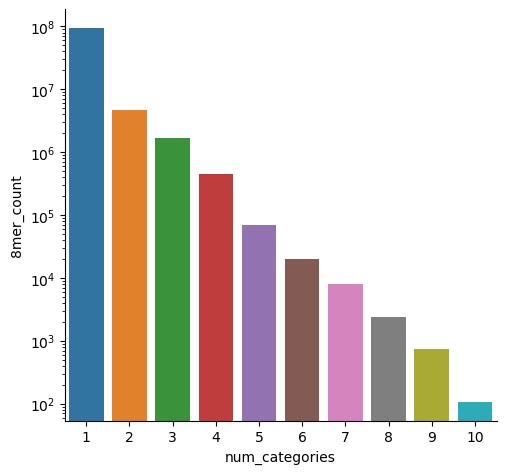

In [13]:
df_counts = pd.DataFrame()
df_counts["num_categories"] = list(range(1, 11))
df_counts["8mer_count"] = [c[i] for i in range(1, 11)]

import matplotlib.pyplot as plt
seaborn.catplot(data=df_counts, x="num_categories", y="8mer_count", kind="bar")
plt.yscale('log')

In [14]:
94965627/sum(c.values())

0.9323898733967926

In [15]:
all_cats = {kmer for kmer, num in kmer_to_num_categories.items() if num == 10}

In [16]:
len(all_cats)

107

In [17]:
for p in all_cats:
    if len(set(p)) == 1:
        print(p)

HHHHHHHH
AAAAAAAA
SSSSSSSS
GGGGGGGG
DDDDDDDD
EEEEEEEE


In [18]:
for p in all_cats:
    if len(set(p)) >= 6:
        print(p)

SQRQATKD
PQIEVTFD
FNDSQRQA
DANGILNV
VPAYFNDS
AYFNDAQR
RIINEPTA
NDAQRQAT
LTRAKFEE
GAGKSTLL
YNADFDGD
YFNDSQRQ
QRQATKDA
AVITVPAY
TRAKFEEL
RGVPQIEV
VNPDEAVA
VLRIINEP
VPAYFNDA
PAYFNDSQ
GGGTFDVS
VIGIDLGT
AYFNDSQR
YFNDAQRQ
ITVPAYFN
TVPAYFND
LRIINEPT
DVTPLSLG
PGWHIECS
NEPTAAAL
GVPQIEVT
VITVPAYF
DSQRQATK
RQATKDAG
INEPTAAA
FNDAQRQA
PGTGKTSL
VPQIEVTF
TLTRAKFE
IINEPTAA
PAYFNDAQ
NDSQRQAT


In [19]:
kmer_to_categories["C" * 8]

{'fungi', 'invertebrates'}

In [22]:
reduced_set = {p for p in all_cats}
last_reduced_set = set()

while reduced_set != last_reduced_set:
    new_reduced_set = set()
    for p1 in reduced_set:
        found_overlap = False
        for p2 in reduced_set:
            if p1 != p2:
                if p1 in p2:
                    found_overlap = True
                    break
                if len(p1) == 8 or len(p2) == 8 or (len(set(p1)) > 2 and len(set(p2)) > 2):
                    if p2.startswith(p1[1:]):
                        new_reduced_set.add(p1[0] + p2)
                        found_overlap = True
                        print(p1, p2, p1[0] + p2)
                        break
        if not found_overlap:
            new_reduced_set.add(p1)
    last_reduced_set = set(reduced_set)
    reduced_set = new_reduced_set
    
    print(reduced_set)
    print(set({len(p) for p in reduced_set}))


AAPAAAAA APAAAAAA AAPAAAAAA
TSSSSSSS SSSSSSSS TSSSSSSSS
SQRQATKD QRQATKDA SQRQATKDA
FNDSQRQA NDSQRQAT FNDSQRQAT
AAAPAAAA AAPAAAAA AAAPAAAAA
VPAYFNDS PAYFNDSQ VPAYFNDSQ
AYFNDAQR YFNDAQRQ AYFNDAQRQ
RIINEPTA IINEPTAA RIINEPTAA
SAAAAAAA AAAAAAAA SAAAAAAAA
LTRAKFEE TRAKFEEL LTRAKFEEL
YGPPGTGK GPPGTGKT YGPPGTGKT
GGGRGGGG GGRGGGGG GGGRGGGGG
LGGGGGGG GGGGGGGG LGGGGGGGG
ASAAAAAA SAAAAAAA ASAAAAAAA
AAAAAAAA AAAAAAAP AAAAAAAAP
YFNDSQRQ FNDSQRQA YFNDSQRQA
QRQATKDA RQATKDAG QRQATKDAG
AVITVPAY VITVPAYF AVITVPAYF
VGPPGVGK GPPGVGKT VGPPGVGKT
PPGTGKTS PGTGKTSL PPGTGKTSL
RGVPQIEV GVPQIEVT RGVPQIEVT
PAPAPAPA APAPAPAP PAPAPAPAP
APAPAPAP PAPAPAPA APAPAPAPA
VLRIINEP LRIINEPT VLRIINEPT
VPAYFNDA PAYFNDAQ VPAYFNDAQ
PAYFNDSQ AYFNDSQR PAYFNDSQR
LLSGGLDS LSGGLDSS LLSGGLDSS
GPPGTGKT PPGTGKTS GPPGTGKTS
AASAAAAA ASAAAAAA AASAAAAAA
AYFNDSQR YFNDSQRQ AYFNDSQRQ
YFNDAQRQ FNDAQRQA YFNDAQRQA
EEEEEKEE EEEEKEEE EEEEEKEEE
GEEEEEEE EEEEEEEA GEEEEEEEA
EPTAAALA PTAAALAY EPTAAALAY
ITVPAYFN TVPAYFND ITVPAYFND
GGGGGGGG GGGGGGGA GG

In [23]:
{p for p in reduced_set if len(p) > 10}

{'AVITVPAYFNDSQRQATKDAG',
 'LYGPPGTGKTSL',
 'RGVPQIEVTFD',
 'VLRIINEPTAAALAYG',
 'VPAYFNDAQRQAT'}

In [ ]:

all_kmers = list(kmer_to_categories.keys())


In [33]:
from collections import defaultdict
data = defaultdict(list)
data["seq"] = all_kmers

In [34]:
all_categories = sorted(category_to_ident_to_seq.keys())

    

In [35]:
from tqdm import tqdm

for kmer in tqdm(all_kmers):
    kmer_cats = kmer_to_categories[kmer]
    for cat in all_categories:
        data[cat].append(cat in kmer_cats)
    data["label_count"].append(len(set(kmer_cats)))
for (k, vs) in data.items():
    print(k, len(vs))
df_8mer = pd.DataFrame(data)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101851843/101851843 [02:44<00:00, 619949.87it/s]


seq 101851843
archaea 101851843
bacteria 101851843
fungi 101851843
human 101851843
invertebrates 101851843
mammals 101851843
plants 101851843
rodents 101851843
vertebrates 101851843
viruses 101851843
label_count 101851843


In [38]:
%time sorted(all_kmers)

CPU times: user 1min 31s, sys: 4min 57s, total: 6min 29s
Wall time: 7min 34s


['AAAAAAAA',
 'AAAAAAAC',
 'AAAAAAAD',
 'AAAAAAAE',
 'AAAAAAAF',
 'AAAAAAAG',
 'AAAAAAAH',
 'AAAAAAAI',
 'AAAAAAAK',
 'AAAAAAAL',
 'AAAAAAAM',
 'AAAAAAAN',
 'AAAAAAAP',
 'AAAAAAAQ',
 'AAAAAAAR',
 'AAAAAAAS',
 'AAAAAAAT',
 'AAAAAAAV',
 'AAAAAAAW',
 'AAAAAAAY',
 'AAAAAACA',
 'AAAAAACD',
 'AAAAAACE',
 'AAAAAACG',
 'AAAAAACL',
 'AAAAAACN',
 'AAAAAACQ',
 'AAAAAACR',
 'AAAAAACS',
 'AAAAAACT',
 'AAAAAACV',
 'AAAAAADA',
 'AAAAAADC',
 'AAAAAADD',
 'AAAAAADE',
 'AAAAAADF',
 'AAAAAADG',
 'AAAAAADH',
 'AAAAAADI',
 'AAAAAADK',
 'AAAAAADL',
 'AAAAAADN',
 'AAAAAADP',
 'AAAAAADQ',
 'AAAAAADR',
 'AAAAAADS',
 'AAAAAADT',
 'AAAAAADV',
 'AAAAAADY',
 'AAAAAAEA',
 'AAAAAAED',
 'AAAAAAEE',
 'AAAAAAEF',
 'AAAAAAEG',
 'AAAAAAEH',
 'AAAAAAEK',
 'AAAAAAEL',
 'AAAAAAEM',
 'AAAAAAEN',
 'AAAAAAEP',
 'AAAAAAEQ',
 'AAAAAAER',
 'AAAAAAES',
 'AAAAAAET',
 'AAAAAAEV',
 'AAAAAAEY',
 'AAAAAAFA',
 'AAAAAAFD',
 'AAAAAAFE',
 'AAAAAAFG',
 'AAAAAAFH',
 'AAAAAAFK',
 'AAAAAAFN',
 'AAAAAAFP',
 'AAAAAAFR',
 'AAAAAAFS',
 'AAAAAAFT',

In [37]:
df_8mer.to_csv("../data/swissprot-8mers.csv")